# Business Understanding
#### Q1 :When should I visit Seattle? The listing availabilities by months.
#### Q2 : What is the relationship between the number of Reviews and prices?
#### Q3: What are the factors affects the price?

In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels
import sklearn
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from IPython.display import Image
%matplotlib inline

df_calendar=pd.read_csv('C:/Users/wizchu/DS/calendar.csv')
df_listings = pd.read_csv('C:/Users/wizchu/DS/listings.csv')
df_reviews = pd.read_csv('C:/Users/wizchu/DS/reviews.csv')

# Data Understanding
How big dataset is, in volume? and How many rows and columns? What are the columns I can use? 

How much data is missing?

How many columns have text, numeric or categorical values?

What are the time period for datasets?  

In [128]:
# check df_calendar
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [129]:
# check df_listings
df_listings .head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [130]:
# check df_reviews
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [131]:
#check all the columns in three datasets
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [132]:
df_calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [133]:
df_reviews.columns

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')

In [134]:
# how big is the dataset
df_calendar.shape

(1393570, 4)

In [135]:
# how big is the dataset
df_reviews.shape

(84849, 6)

In [136]:
# how big is the dataset
df_listings.shape

(3818, 92)

# Data Understanding
### Explore data in df_calendar, to answer Q1 When should I visit Seattle? The listing availabilities by months.

In [137]:
# making the month and year columns  
df_calendar['month']=pd.to_datetime(df_calendar['date']).dt.month
df_calendar['year']=pd.to_datetime(df_calendar['date']).dt.year

In [138]:
# combine month and year to a column , so I can have the plot using YYYY-MM 
df_calendar['MonthYear'] = pd.to_datetime(df_calendar[['year', 'month']].assign(Day=1))

In [139]:
# I check one listing_id, just to better understand what is the data showing for month 
# find out that 2016-01 and 2017-01 have missing date, so maybe it is better to combine the two months 
df_calendar[(df_calendar['listing_id'] ==241032)].groupby(["MonthYear"]).count()

,listing_id,date,available,price,month,year
MonthYear,,,,,,
2016-01-01,28,28,28,12,28,28
2016-02-01,29,29,29,26,29,29
2016-03-01,31,31,31,31,31,31
2016-04-01,30,30,30,30,30,30
2016-05-01,31,31,31,31,31,31
2016-06-01,30,30,30,30,30,30
2016-07-01,31,31,31,31,31,31
2016-08-01,31,31,31,31,31,31
2016-09-01,30,30,30,30,30,30


Text(0.5, 1.0, 'Number of unique listings by month')

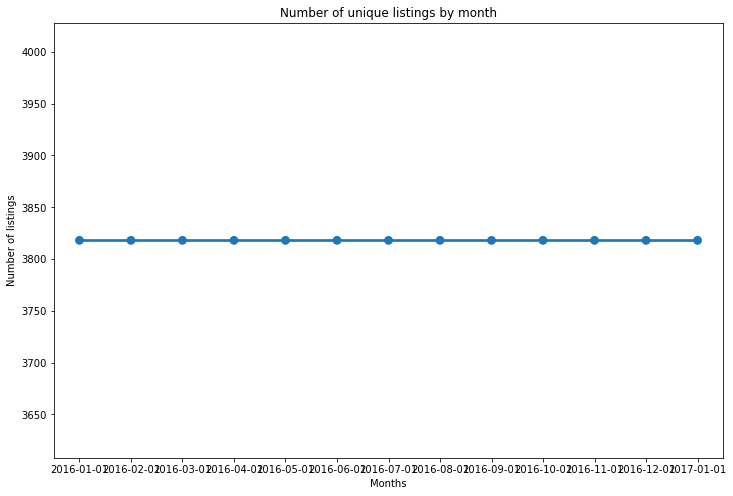

In [140]:
#every month has the same number of listing 
month_listing=df_calendar.groupby(['MonthYear'])["listing_id"].nunique()
month_listing=month_listing.to_frame().reset_index()
count = df_calendar.groupby(['MonthYear'])["listing_id"].nunique()

plt.subplots(figsize = (12,8))
ax = sns.pointplot(data=month_listing,x=month_listing['MonthYear'].astype(str),y=month_listing['listing_id'])
plt.ylabel('Number of listings')
plt.xlabel('Months')
plt.title('Number of unique listings by month')

In [141]:
# The price is only showing when the listing is avaiable, this can be used later 
df_calendar.loc[df_calendar['available'] =='f']['price'].shape
df_calendar.loc[df_calendar['available'] =='f']['price'].isnull().shape

(459028,)

#### From above chart, I know the missing data in the two months 2016-01 and 2017-0, so I combined the two months 2016-01 and 2017-01 to do the analysis. 

Text(0.5, 1.0, 'Number of unique listings by month')

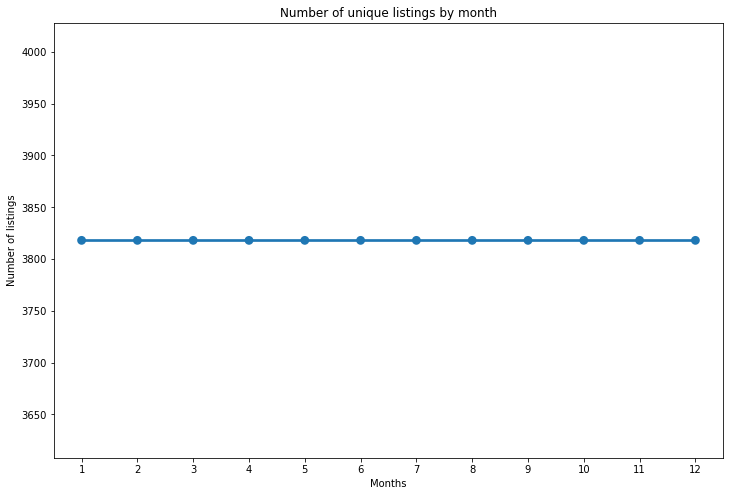

In [142]:
#  I plot the dataset again when combining two months, in order to know if we still have the same unique listings  
month_listing1=df_calendar.groupby(['month'])["listing_id"].nunique()
month_listing1=month_listing1.to_frame().reset_index()
count = df_calendar.groupby(['month'])["listing_id"].nunique()

plt.subplots(figsize = (12,8))
ax = sns.pointplot(data=month_listing1,x=month_listing1['month'].astype(str),y=month_listing1['listing_id'])
plt.ylabel('Number of listings')
plt.xlabel('Months')
plt.title('Number of unique listings by month')

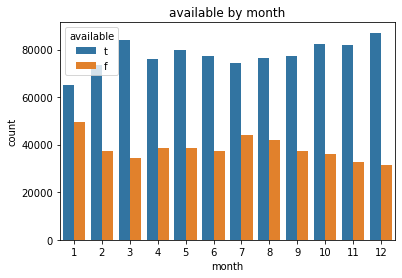

In [143]:
# ploting for available by month
sns.countplot(data = df_calendar, x = df_calendar['month'], hue = 'available');
plt.title('available by month');

#### We can see the  avaiablility and unavaiblity number for each month but seems every months has different dates, it's be easy for us to know which month is doing better using %

I decided to use a ration to better understanding each month, using the month of not available lising / all listings 

In [144]:
# create a ration dataset by month 
ratio_each_month=df_calendar.loc[df_calendar['available'] =='f'].groupby(['month'])["listing_id"].count()/df_calendar.groupby(['month'])["listing_id"].count()

In [145]:
ratio_each_month=ratio_each_month.to_frame()

Text(0.5, 1.0, 'Ratio by Month')

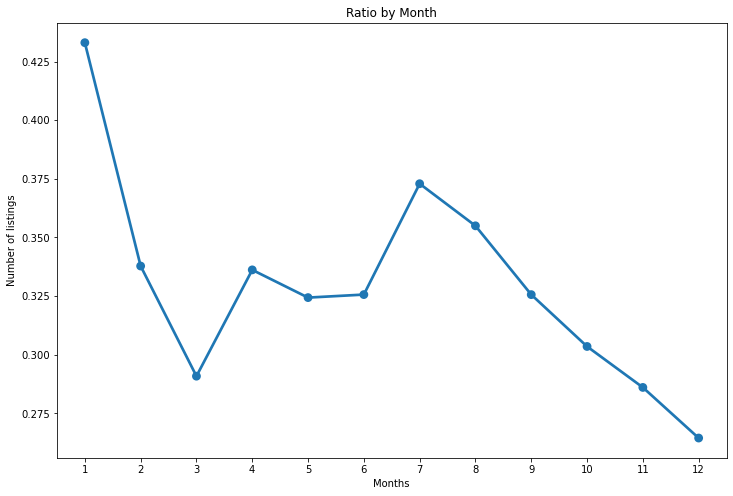

In [146]:
#ploting the chart, ration by month 
plt.subplots(figsize = (12,8))
ax = sns.pointplot(data=ratio_each_month,x=ratio_each_month.index,y=ratio_each_month['listing_id'])
plt.ylabel('Number of listings')
plt.xlabel('Months')
plt.title('Ratio by Month')

#### From the chart above, I know that Jan is the most popular most month and december is the least popular month. Now, we know which month is the most popular month, does that affect the price?

In [147]:
#Because I am looking at price only, I will drop all the unavaibale listing with price NaN
# drop the Nan Price
df_calendar1=df_calendar.dropna(subset = ["price"])

In [148]:
# to plot the data, I need to remove $
price=df_calendar1['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)
    
df_calendar1['price']=prices

<ipython-input-148-9f8932b031fd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_calendar1['price']=prices


In [149]:
df_calendar1.head()

,listing_id,date,available,price,month,year,MonthYear
0,241032,2016-01-04,t,85.0,1,2016,2016-01-01
1,241032,2016-01-05,t,85.0,1,2016,2016-01-01
9,241032,2016-01-13,t,85.0,1,2016,2016-01-01
10,241032,2016-01-14,t,85.0,1,2016,2016-01-01
14,241032,2016-01-18,t,85.0,1,2016,2016-01-01


In [150]:
# I create a colulmn for average price by month
price_permonth=df_calendar1.groupby(["month"])["price"].mean()

In [151]:
price_permonth=price_permonth.to_frame()

Text(0.5, 1.0, 'Mean for Each Month')

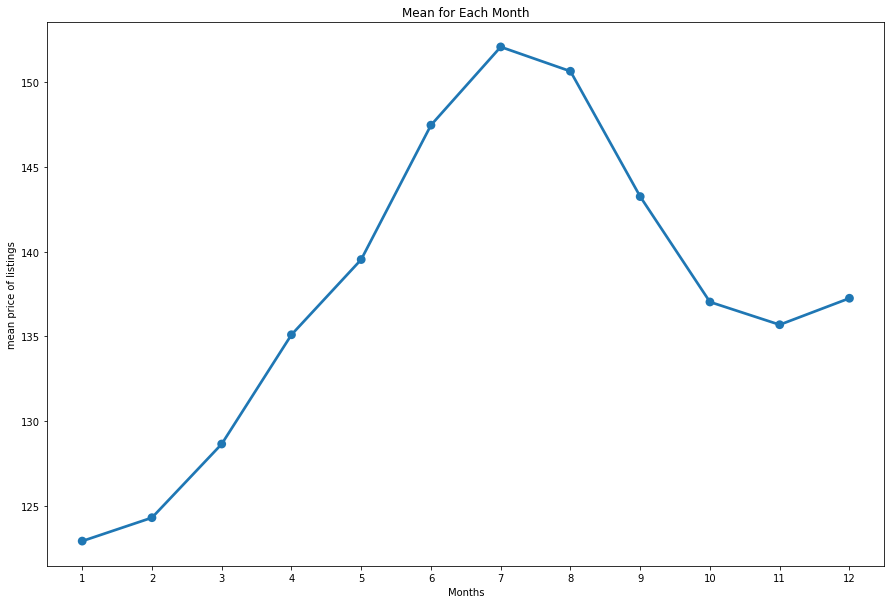

In [152]:
# this plot can tell me average price by month
plt.subplots(figsize = (15,10))
ax = sns.pointplot(data=price_permonth,x=price_permonth.index,y=price_permonth['price'])
plt.ylabel('mean price of listings')
plt.xlabel('Months')
plt.title('Mean for Each Month')

#### We know highest pirce in in July and lowest price in Jan from above chart.
#### From the findings, I know January is popular but it has the lowest price and July will not be a good time to visit Seattle because it is hard to book and has a higher price  

### Explore data in df_listings, to answer Q2 What is the relationship between the Number of Reviews and Prices?

In [153]:
#checking the NaN 
df_listings[['price','number_of_reviews']].isnull().sum()

price                0
number_of_reviews    0
dtype: int64

In [154]:
df_listings1=df_listings[['price','number_of_reviews']]

In [155]:
# remove the $ from price 
df_listings1['price'] = df_listings1['price'].str.replace("[$, ]", "").astype("float")

<ipython-input-155-20c157e62c1e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listings1['price'] = df_listings1['price'].str.replace("[$, ]", "").astype("float")
<ipython-input-155-20c157e62c1e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings1['price'] = df_listings1['price'].str.replace("[$, ]", "").astype("float")


In [156]:
df_listings1[['price','number_of_reviews']].describe()

,price,number_of_reviews
count,3818.000000,3818.000000
mean,127.976166,22.223415
std,90.250022,37.730892
min,20.000000,0.000000
25%,75.000000,2.000000
50%,100.000000,9.000000
75%,150.000000,26.000000
max,1000.000000,474.000000


Text(0.5, 1.0, 'Reviews Distrubution for Listings')

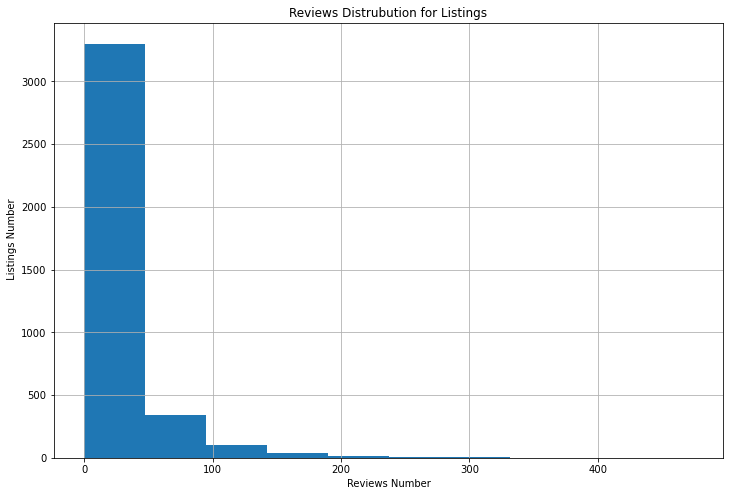

In [60]:
#how many reviews does most of the listing have 
df_listings1.hist('number_of_reviews', bins=10, figsize=(12,8))
plt.xlabel('Reviews Number')
plt.ylabel(' Listings Number')
plt.title('Reviews Distrubution for Listings')

#### From the plot above for price and number of reviews, most of the rating has about 50 number of reviews. 
#### I want to know how are the listing with 50 reviews compare with listing over 50 reviews? 

In [157]:
# the average price of the number_of_reviews <= 50 listings and the count 
print(df_listings1['price'].loc[df_listings1['number_of_reviews'] <=50].mean())
print(df_listings1['price'].loc[df_listings1['number_of_reviews'] <=50].count())

131.89754343918514
3338


In [158]:
# the average price of the total number_of_reviews listings and the count 
print(df_listings1['price'].count())
print(df_listings1['price'].mean())

3818
127.97616553169199


In [159]:
# the average price of the number_of_reviews > 50 listings and the count 
print(df_listings1['price'].loc[df_listings1['number_of_reviews'] >50].mean())
print(df_listings1['price'].loc[df_listings1['number_of_reviews'] >50].count())

100.70625
480


#### Listings with number_of_reviews over 50 has the higher price of <= 50.
I want to look into more details, so I decieded to check the listings under 50 review, to see if that still the trend. Therefore, I created a set for listing with under 50 reviews. 

In [160]:
# create a dataset for number_of_reviews<= 50 
df_listings1_50=df_listings1.loc[df_listings1['number_of_reviews'] <=50]

In [161]:
# put the set into five groups, the goups have simialar numbers of records, so I can see if every groups has the same trends. 
df_listings1_50['Bins'] =  pd.qcut(df_listings1_50['number_of_reviews'], 5)
df_listings1_50['Bins'].value_counts()

<ipython-input-161-1e9cb6e65fdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings1_50['Bins'] =  pd.qcut(df_listings1_50['number_of_reviews'], 5)


(-0.001, 1.0]    937
(10.0, 21.0]     647
(21.0, 50.0]     642
(4.0, 10.0]      571
(1.0, 4.0]       541
Name: Bins, dtype: int64

In [162]:
df_listings1_50.head()

,price,number_of_reviews,Bins
1,150.0,43,"(21.0, 50.0]"
2,975.0,20,"(10.0, 21.0]"
3,100.0,0,"(-0.001, 1.0]"
4,450.0,38,"(21.0, 50.0]"
5,120.0,17,"(10.0, 21.0]"


In [163]:
#I may plot the charts several time, so create a function to plot the chart 

def plotting (df,groupby,average):
    '''
    Return the plot with the groupby and average columns. 
    df -- the dataset we want to look in 
    groupby --  the column want to group by 
    average --   the column we want to get the average number
    
    '''
    sns.barplot(data=df.groupby([groupby]).mean(), x = df.groupby([groupby]).mean().index , y = df.groupby([groupby])[average].mean())
    plt.ylabel(average)
    plt.xlabel(groupby)
    plt.title('Average '+average + ' per ' + groupby)

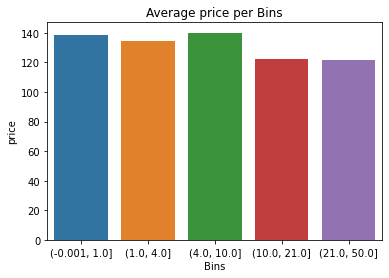

In [164]:
plotting(df_listings1_50,'Bins','price')

#### Based on above chart, we can find out that the listing with higher number of reviews do have lower prices. Let look at the price chart see if that also the case. 

Text(0.5, 1.0, 'Price Distrubution for Listings')

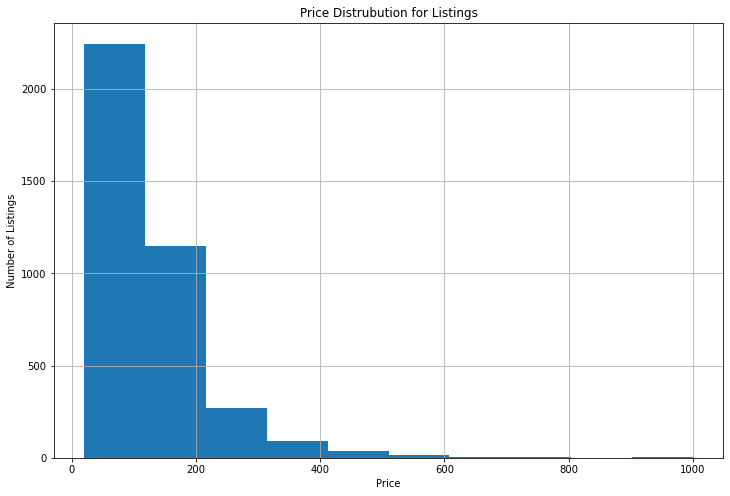

In [165]:
#  to see what are the price for most of the listing 
df_listings1.hist('price', bins=10, figsize=(12,8))
plt.xlabel('Price')
plt.ylabel(' Number of Listings ')
plt.title('Price Distrubution for Listings')

#### From the plot above for price and number of listings, most of the listing is about $200. 

In [166]:
# so let check about the reviews number for listing $200, and others 
print(df_listings1['number_of_reviews'].loc[df_listings1['price'] <=200].mean())
print(df_listings1['number_of_reviews'].loc[df_listings1['price'] <=200].count())

print(df_listings1['number_of_reviews'].loc[df_listings1['price'] >200].mean())
print(df_listings1['number_of_reviews'].loc[df_listings1['price'] >200].count())

print(df_listings1['number_of_reviews'].count())
print(df_listings1['number_of_reviews'].mean())

23.771496578399287
3361
10.838074398249454
457
3818
22.22341540073337


In [167]:
#  create a dataset for listing under $200 
df_listings1_200=df_listings1.loc[df_listings1['price'] <=200]

In [168]:
# put the listings into 5 groups, to see if we using price bin the trend is also consistent with the chart I had above
df_listings1_200['pricebin'] =  pd.qcut(df_listings1_200['price'], 5)
df_listings1_200['pricebin'].value_counts()

<ipython-input-168-91023003683c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings1_200['pricebin'] =  pd.qcut(df_listings1_200['price'], 5)


(19.999, 65.0]    717
(87.0, 105.0]     673
(140.0, 200.0]    668
(105.0, 140.0]    667
(65.0, 87.0]      636
Name: pricebin, dtype: int64

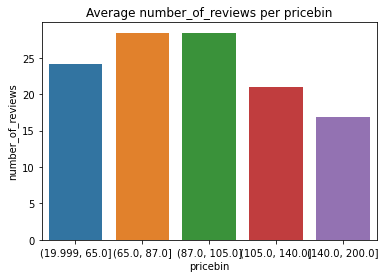

In [169]:
plotting(df_listings1_200,'pricebin','number_of_reviews')

#### The Avg. review chart here also showing the trends that higher numbers of review lower price

### Explore data in df_listings, to answer Q3 What are the factors affects the price?

In [170]:
#These are the columns that I think will be useful and affects the prices 
# including the area, room information, host information and review information
df_listings2=df_listings[['city','host_is_superhost','host_response_rate','host_acceptance_rate','neighbourhood',
                         'room_type','property_type','bed_type','beds','bedrooms','bathrooms','square_feet',
                         'number_of_reviews','extra_people', 'minimum_nights','review_scores_rating','price']]

In [171]:
df_listings2.describe()

,beds,bedrooms,bathrooms,square_feet,number_of_reviews,minimum_nights,review_scores_rating
count,3817.000000,3812.000000,3802.000000,97.000000,3818.000000,3818.000000,3171.000000
mean,1.735394,1.307712,1.259469,854.618557,22.223415,2.369303,94.539262
std,1.139480,0.883395,0.590369,671.404893,37.730892,16.305902,6.606083
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000
25%,1.000000,1.000000,1.000000,420.000000,2.000000,1.000000,93.000000
50%,1.000000,1.000000,1.000000,750.000000,9.000000,2.000000,96.000000
75%,2.000000,2.000000,1.000000,1200.000000,26.000000,2.000000,99.000000
max,15.000000,7.000000,8.000000,3000.000000,474.000000,1000.000000,100.000000


In [172]:
# replace $ and % in order to do heatmap understanding the relationship with price
df_listings2['price']=df_listings2['price'].str.replace("[$, ]", "").astype("float")
df_listings2['extra_people']=df_listings2['extra_people'].str.replace("$", "").astype("float")
df_listings2['host_response_rate'] = df_listings2['host_response_rate'].str.replace("%", "").astype("float")
df_listings2['host_acceptance_rate'] = df_listings2['host_acceptance_rate'].str.replace("%", "").astype("float")

<ipython-input-172-640bcf956697>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_listings2['price']=df_listings2['price'].str.replace("[$, ]", "").astype("float")
<ipython-input-172-640bcf956697>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_listings2['price']=df_listings2['price'].str.replace("[$, ]", "").astype("float")
<ipython-input-172-640bcf956697>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_listings2['extra_people']=df_listings2['extra_people'].str.replace("$", "").astype("float")
<ipython-input-172-640bcf956697>:3: Se

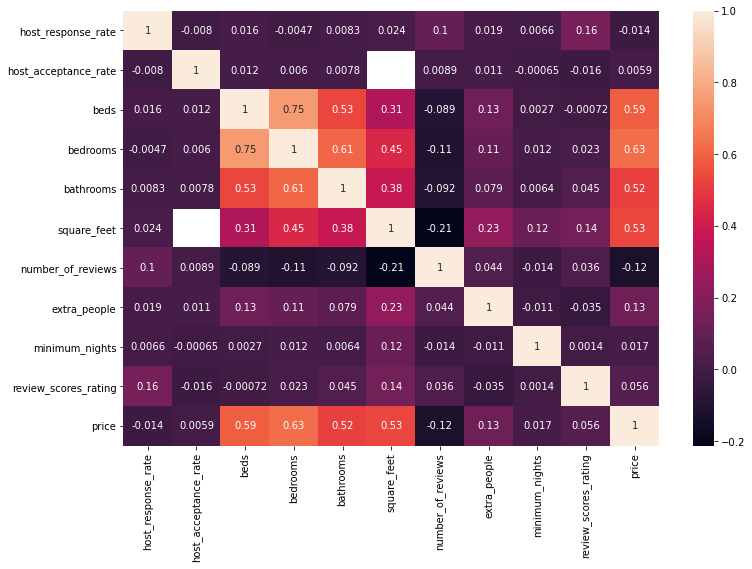

In [173]:
#using heatmap to see
plt.figure(figsize=(12,8))
sns.heatmap(df_listings2.corr(), annot=True,);

#### From the heat map we see that the beds, bedrooms, bathrooms number affect the price most. 

# Prepare the Data

In [174]:
# checking each column Nan value
df_listings2.isnull().sum()/df_listings2.shape[0]

city                    0.000000
host_is_superhost       0.000524
host_response_rate      0.136983
host_acceptance_rate    0.202462
neighbourhood           0.108958
room_type               0.000000
property_type           0.000262
bed_type                0.000000
beds                    0.000262
bedrooms                0.001572
bathrooms               0.004191
square_feet             0.974594
number_of_reviews       0.000000
extra_people            0.000000
minimum_nights          0.000000
review_scores_rating    0.169460
price                   0.000000
dtype: float64

In [175]:
#seem most of the square_feet is Nan, I decided to drop square_feet
df_listings2=df_listings2.drop('square_feet',axis=1)

In [176]:
#drop other rows with NaN
df_listings2=df_listings2.dropna() 

In [177]:
# the categories data
df_listings2.select_dtypes(include=['object']).columns

Index(['city', 'host_is_superhost', 'neighbourhood', 'room_type',
       'property_type', 'bed_type'],
      dtype='object')

In [178]:
# make a dataframe for dummy
dummy_column=df_listings2.select_dtypes(include=['object']).columns
dummy_cat=pd.get_dummies(df_listings2[dummy_column])

In [179]:
#create my final prediction dataset with dummy dataset and the orignal dataset
df_final=pd.concat([df_listings2,dummy_cat],axis=1)

In [180]:
#dropping the catagory columns 
df_final=df_final.drop(df_final[dummy_column],axis=1)

In [181]:
#create x for variables and y for prediction 
x=df_final.drop('price',axis=1)
y=df_final['price']

# Modeling

In [182]:
# build the models 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
m_model = linear_model.LinearRegression()
m_model.fit(X_train, y_train)
y_train_pred = m_model.predict(X_train)
y_test_pred = m_model.predict(X_test)

# Evaluation

In [183]:
# checking the score of the model 
print(r2_score(y_train, m_model.predict(X_train))) 
print(mean_squared_error(y_train, m_model.predict(X_train)))

0.6392014784153555
2546.5441547873875
